In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [96]:
diabetes=pd.read_csv('/content/sample_data/diabetes.csv')
diabetes.head()
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [97]:
diabetes.eq(0).sum()
# we could see that some of column values in th dataset are 0. But obviously for any human, the Glucose, BloodPressure, SkinThickness, Insulin, BMI values cannot be 0.
#Hence some data cleanup is required for these columns for meanginful data interpretation through visualization

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [98]:
# Data Cleanup :

#copying the original data into a new dataframe to avoid loss of actual data
dnew=diabetes.copy()

#replacing 0 with NaN for columns Glucose, BloodPressure, SkinThickNess, BMI
#note: For Pregnancies column 0 is a valid value hence not conidered for cleaning.
dnew[['Glucose','BloodPressure','SkinThickness','BMI']]=dnew[['Glucose','BloodPressure','SkinThickness','BMI',]].replace(0,np.NaN)

#dividing the dataset into 2 parts, diabetes-positive dataframe and diabetes-negative (non-diabetes) dataframe
#this  division of dataset is necessary as NaN values in the columns need to be computed depending on diabetes condition (as the Glucose, BloodPressure, BMI  values differ for diabetetic and non-diabetic people)
dia_positive=dnew[dnew['Outcome']==1].copy()
dia_negative=dnew[dnew['Outcome']==0].copy()

#as for non-diabetic patients insulin levels will not be 0, hence considering it for cleaning here
dia_negative['Insulin']=dia_negative['Insulin'].replace(0,np.NaN)

#filling the NaN  values in columns in diabetes positive dataset with the median value of each columns for diabetes positive patients
dia_positive.fillna(dia_positive.median(), inplace=True)

#filling the NaN  values in columns in diabetes negative dataset with the median value of each columns for diabetes negative patients
dia_negative.fillna(dia_negative.median(), inplace=True)

#adding the two datasets into one dataframe to plot the visualization with this whole clean datafame
df_cleaned=pd.concat([dia_positive,dia_negative])
df_cleaned.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
2,8,183.0,64.0,32.0,0.0,23.3,0.672,32,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1


<Axes: xlabel='Age', ylabel='BMI'>

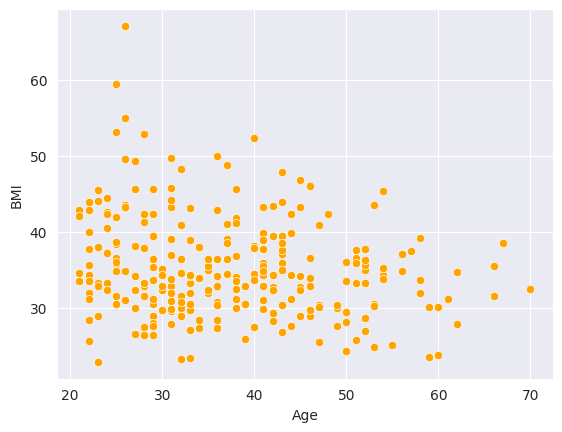

In [99]:
#6. What is the distribution of age and BMI (Body Mass Index) among diabetic patients?

sns.set_style('darkgrid')
sns.scatterplot(data=df_cleaned[df_cleaned['Outcome']==1], x='Age', y='BMI', color='orange',)

#Distribution is visualized using a scatterplot for only diabetic patients
#Inference: as per given data For diabetic patients we can see a trend of decreasing BMI with increase of age

<Axes: xlabel='Age', ylabel='BloodPressure'>

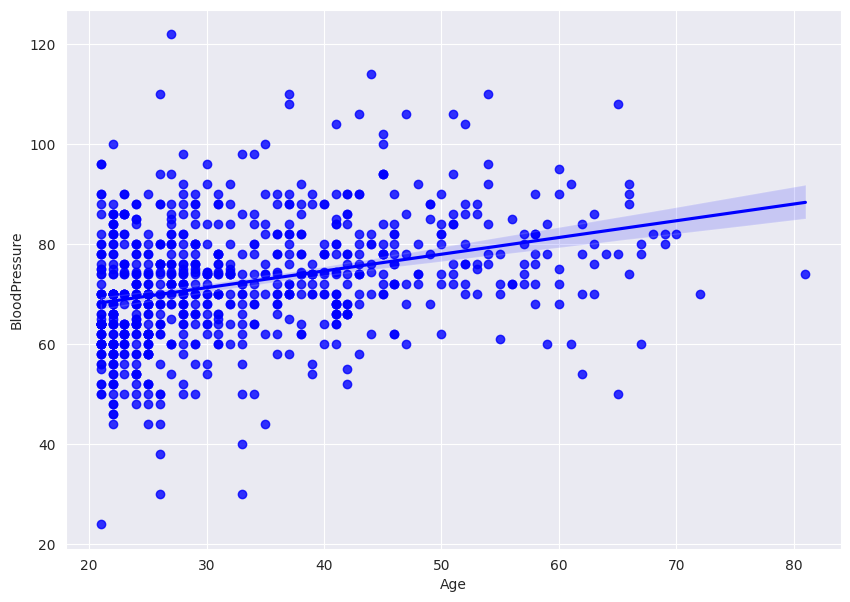

In [100]:
#7. How do blood pressure levels vary across different age groups?
fig,axes=plt.subplots(figsize=(10,7))
sns.regplot(data=df_cleaned, x='Age', y='BloodPressure',color='blue')

#Using a lineplot to visualize how blood pressure level in varying with age
#Inference: as per given data it shows that the blood pressure levels have a tendency to increase with progression of age


<Axes: xlabel='BMI', ylabel='Glucose'>

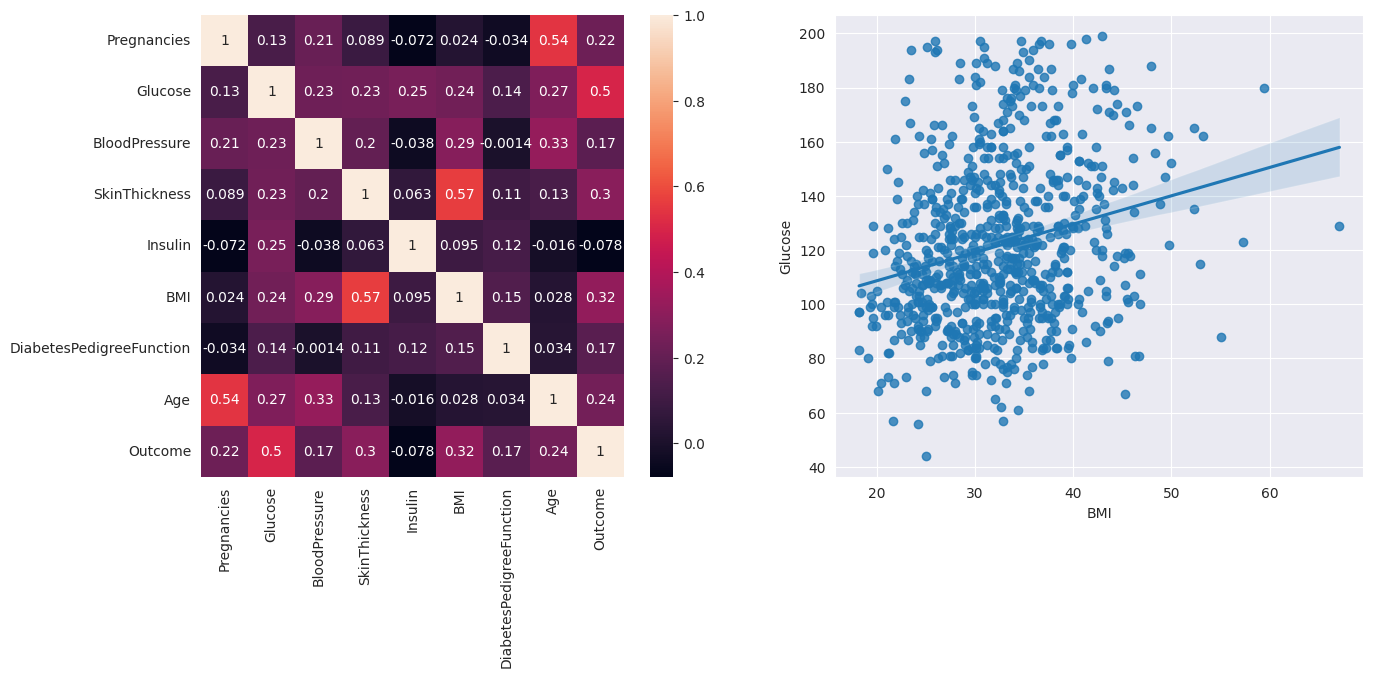

In [101]:
#8. Is there a correlation between BMI and Glucose levels?

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.heatmap(df_cleaned.corr(), annot=True, ax=axes[0])
sns.regplot(data=df_cleaned, x='BMI', y='Glucose', ax=axes[1])

# Used a heatmap and regression plot to visualize the correlation between BMI and Glucose level
#Inference: We can see a postive correlation (value=0.24 from heatmap) between BMI and Glucose, so we can say that the Glucose level tends to increase with increase in BMI and vice versa


<Axes: xlabel='Outcome', ylabel='Age'>

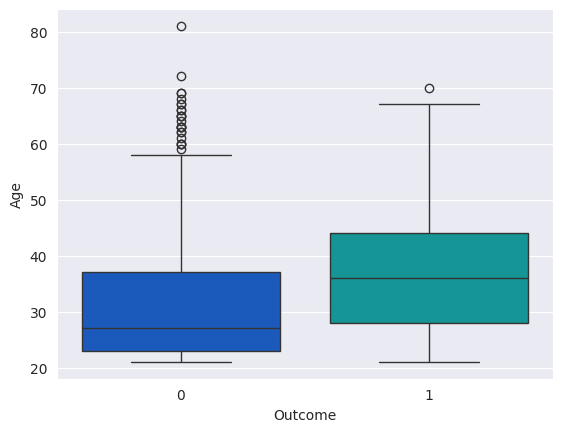

In [102]:
#9. Are there any observable patterns in the relationship between diabetes progression and patient age?

sns.boxplot(data=df_cleaned,x='Outcome',y='Age', hue='Outcome', legend=False, palette='winter')

#using a boxplot to visualize the relationship of diabetes progression with age
#Inference: we can say from the plots that more people in the higher age group shows a tendency of getting  diabetes. However there are outliers in both sections

<Axes: xlabel='Age', ylabel='Insulin'>

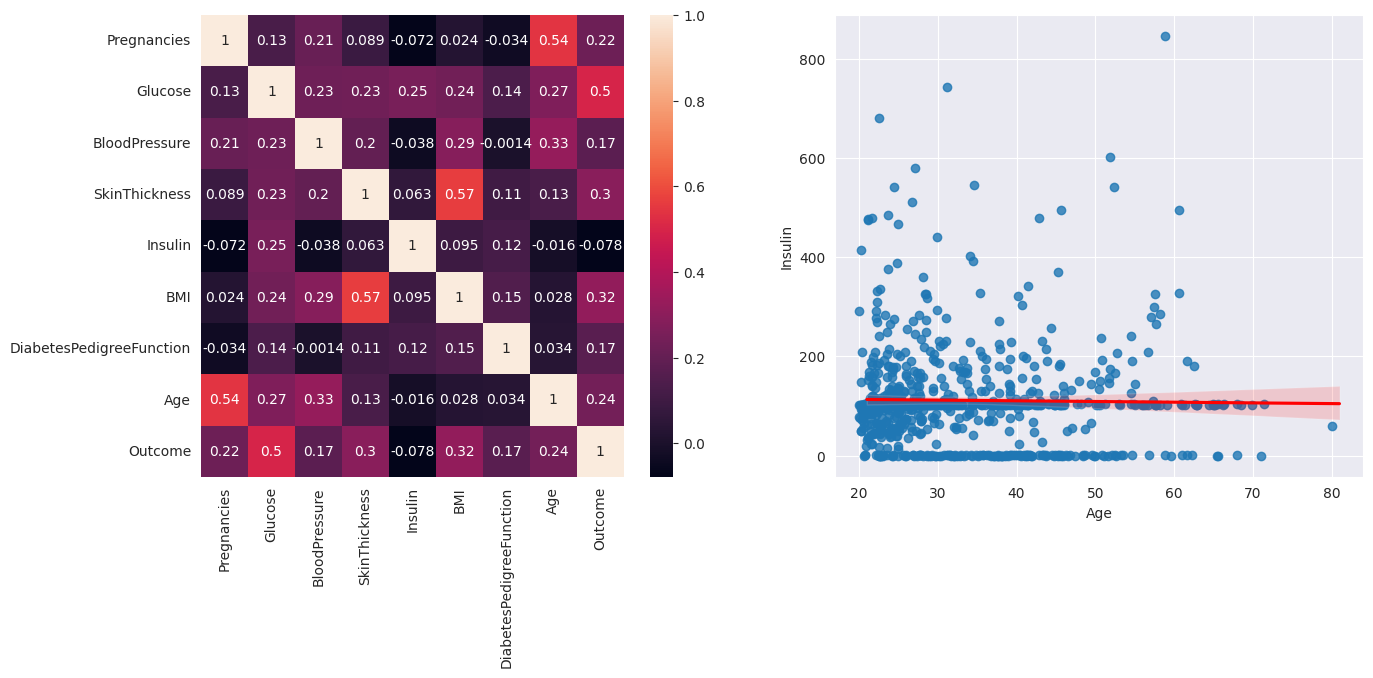

In [103]:
#10. How do insulin levels vary across different age groups?

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.heatmap(df_cleaned.corr(), annot=True, ax=axes[0])
sns.regplot(data=df_cleaned,x='Age',y='Insulin', line_kws={"color":"red"}, x_jitter=True, y_jitter=True)

#using heatmaps and regplots to visualize distribution on insulin levels across age groups
#Inference: we can see a negative correlation( value=-0.016 from heatmaps)  and can infer that the insulin levels shows a decrease with age .